<a href="https://colab.research.google.com/github/femartinsamorim/programacao-pratica_e_treinamento/blob/main/case_numera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANDO AS BIBLIOTECAS QUE ACHEI NECESSÁRIAS PARA O PROBLEMA PROPOSTO:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings as wr
import numpy as np

wr.filterwarnings('ignore')

In [2]:
# IMPORTANDO A BASE DE DADOS DE OFERTAS:

portfolio_oferta = pd.read_csv('/content/portfolio_ofertas - portfolio_ofertas.csv', delimiter=',')

In [3]:
# IMPORTANDO A BASE DE DADOS DOS CLIENTES:

dados_cliente = pd.read_csv('/content/dados_clientes.csv', delimiter=',')

In [4]:
# IMPORTANDO A BASE DE DADOS DOS EVENTOS:

eventos_oferta = pd.read_csv('/content/eventos_ofertas.csv',delimiter=',',encoding='latin-1')

# OBSERVAÇÃO.: ESSA BASE DE DADOS ESTAVA COM PROBLEMA DE CONVERSÃO "UFT-8", ENTÃO FOI NECESSÁRIO TROCAR A CODIFICAÇÃO PARA "LATIN-1"

Realizarei a exploração e tratamentos de cada uma das bases de forma separada, depois realizarei uma união pelo "códigos" que identifiquei possuir chaves para "join" entre as tabelas.

In [5]:
# VERIFICANDO OS ITENS DISPONÍVEIS NA BASE DE DADOS DO PORTFOLIO:

portfolio_oferta.head(15)

,Unnamed: 0,recompensa,canal,valor_minimo,duracao,id,oferta
0,1,10,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,"compre 1, leve 2"
1,2,10,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,"compre 1, leve 2"
2,3,0,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informativo
3,4,5,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,"compre 1, leve 2"
4,5,5,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,desconto
5,6,3,"['web', 'email', 'mobile', 'social']",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,desconto
6,7,2,"['web', 'email', 'mobile', 'social']",10,10,fafdcd668e3743c1bb461111dcafc2a4,desconto
7,8,0,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informativo
8,9,5,"['web', 'email', 'mobile', 'social']",5,5,f19421c1d4aa40978ebb69ca19b0e20d,"compre 1, leve 2"
9,10,2,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,desconto


In [6]:
# VERIFICAND O TIPO DE DADOS E QUANTIDADE DE REGISTROS:

portfolio_oferta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10 non-null     int64 
 1   recompensa    10 non-null     int64 
 2   canal         10 non-null     object
 3   valor_minimo  10 non-null     int64 
 4   duracao       10 non-null     int64 
 5   id            10 non-null     object
 6   oferta        10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [7]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DA TABELA:

portfolio_oferta.describe().astype(int)

,Unnamed: 0,recompensa,valor_minimo,duracao
count,10,10,10,10
mean,5,4,7,6
std,3,3,5,2
min,1,0,0,3
25%,3,2,5,5
50%,5,4,8,7
75%,7,5,10,7
max,10,10,20,10


In [8]:
# ESSA BASE DE DADOS NÃO POSSUI REGISTROS NULOS, NESTE CASO NÃO PRECISAREI TRATAR ESSE "PROBLEMA" NELA:

portfolio_oferta.isnull().sum()

Unnamed: 0      0
recompensa      0
canal           0
valor_minimo    0
duracao         0
id              0
oferta          0
dtype: int64

In [9]:
# VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS:

print(f'QUANTIDADE DE LINHAS {portfolio_oferta.shape[0]} E DE {portfolio_oferta.shape[1]} COLUNAS')

QUANTIDADE DE LINHAS 10 E DE 7 COLUNAS


In [10]:
# EXCLUINDO A VARIÁVEL DE INDEX, POIS NÃO TERA NECESSIDADE NAS ANALISES:

portfolio_oferta = portfolio_oferta.drop(columns=['Unnamed: 0'])

In [11]:
# OBTEI EM RENOMEAR AS COLUNAS PARA UM PADRÃO QUE JÁ ESTOU ACOSTUMADO A USAR NAS VARIÁVEIS:

portfolio_oferta = portfolio_oferta.rename(columns={'recompensa':'RECOMPENSA',
                                                    'canal':'CANAL',
                                                    'valor_minimo':'VALOR_MINIMO',
                                                    'duracao':'DURACAO',
                                                    'id':'ID_OFERTA',
                                                    'oferta':'OFERTA'})

In [12]:
portfolio_oferta.head(15)

,RECOMPENSA,CANAL,VALOR_MINIMO,DURACAO,ID_OFERTA,OFERTA
0,10,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,"compre 1, leve 2"
1,10,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,"compre 1, leve 2"
2,0,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,informativo
3,5,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,"compre 1, leve 2"
4,5,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,desconto
5,3,"['web', 'email', 'mobile', 'social']",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,desconto
6,2,"['web', 'email', 'mobile', 'social']",10,10,fafdcd668e3743c1bb461111dcafc2a4,desconto
7,0,"['email', 'mobile', 'social']",0,3,5a8bc65990b245e5a138643cd4eb9837,informativo
8,5,"['web', 'email', 'mobile', 'social']",5,5,f19421c1d4aa40978ebb69ca19b0e20d,"compre 1, leve 2"
9,2,"['web', 'email', 'mobile']",10,7,2906b810c7d4411798c6938adc9daaa5,desconto


A primeira base já está com as informações tratadas como achei necessário. O único ponto de observação é sobre a coluna de "ID", como precisarei dela para fazer o "join" não vou excluí-la, mas os registro presentes nela possuem uma sequência com muitos caracteres, em alguns sistemas isso pode apresentar problema em um cenário real. Em uma situação real que fosse gerar problema para o sistema, poderíamos analisar a possibilidade de converte-la para números binários únicos com menos caracteres, este seria um ponto para análise caso fosse necessário fazer este tratamento.

In [13]:
# VERIFICANDO OS ITENS DISPONÍVEIS NA BASE DE DADOS DOS CLIENTES:

dados_cliente.head(15)

,Unnamed: 0,genero,idade,id,membro_desde,renda_anual
0,1,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,2,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,3,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,4,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,5,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,6,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,7,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,8,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,9,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,10,NaN,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


In [14]:
# VERIFICANDO O TIPO DE DADOS E QUANTIDADE DE REGISTROS:

dados_cliente.info()

# OBSERVAÇÃO: CONFORME PRÉ VISUALIZAÇÃO ACIMA E OS DETALHES ABAIXO, JÁ É POSSÍVEL IDENTIFICAR DADOS NULOS PARA GERERO E RENDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17000 non-null  int64  
 1   genero        14825 non-null  object 
 2   idade         17000 non-null  int64  
 3   id            17000 non-null  object 
 4   membro_desde  17000 non-null  int64  
 5   renda_anual   14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [15]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DA TABELA:

dados_cliente.describe().astype(int)

,Unnamed: 0,idade,membro_desde,renda_anual
count,17000,17000,17000,14825
mean,8500,62,20167034,65404
std,4907,26,11677,21598
min,1,18,20130729,30000
25%,4250,45,20160526,49000
50%,8500,58,20170802,64000
75%,12750,73,20171230,80000
max,17000,118,20180726,120000


In [16]:
# NESSA BASE DE DADOS TEMOS UM PORCENTAGEM DE 12,79% DE REGISTROS NULOS PARA A VARIÁVEIS QUE CITEI ANTES:

round(100*dados_cliente.isnull().sum().sort_values()/dados_cliente.shape[0],2)

# OBSERVAÇÃO.: EM UM CENÁRIO REAL SERIA NECESSÁRIO ANALISAR COMO IRIAMOS TRATA-LOS, POIS ESSA QUANTIDADE É ALTA PARA SER RETIRADA.

Unnamed: 0       0.00
idade            0.00
id               0.00
membro_desde     0.00
genero          12.79
renda_anual     12.79
dtype: float64

In [17]:
# VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS

print(f'QUANTIDADE DE LINHAS {dados_cliente.shape[0]} E DE {dados_cliente.shape[1]} COLUNAS')

QUANTIDADE DE LINHAS 17000 E DE 6 COLUNAS


In [18]:
# EXCLUINDO A VARIÁVEL DE INDEX, POIS NÃO TERÁ NECESSIDADE NAS ANALISES:

dados_cliente = dados_cliente.drop(columns=['Unnamed: 0'])

In [19]:
# TAMBÉM OPTEI EM RENOMEAR AS LINHAS PARA UM PADRÃO QUE JÁ ESTOU ACOSTUMADO A USAR NAS VARIÁVEIS:

dados_cliente = dados_cliente.rename(columns={'idade':'IDADE',
                                                    'membro_desde':'DATA_MEMBRO',
                                                    'genero':'GENERO',
                                                    'renda_anual':'RENDA_ANUAL',
                                                    'id':'ID_CLIENTE'
                                                    })

In [20]:
dados_cliente['GENERO'].unique()

# OBSERVAÇÃO: O QUE SERIA O GENERO O?

array([nan, 'F', 'M', 'O'], dtype=object)

In [21]:
print(f" QUANTIDADE DE REGISTROS COM A OPÇÃO DE GENERO (O): {dados_cliente['GENERO'].loc[(dados_cliente['GENERO'] == 'O')].count()}")

 QUANTIDADE DE REGISTROS COM A OPÇÃO DE GENERO (O): 212


In [22]:
dados_cliente.loc[(dados_cliente['GENERO'] == 'O')].head(15)

# OBSERVAÇÃO: TALVEZ SEJA INTERESSANTE ENTENDER O GENERO (O) IDENTIFICADO PARA VERIFICAR SE É UMA INFORMAÇÃO DO TIPO "SEM GENERO" OU "NÃO IMFORMADO":

,GENERO,IDADE,ID_CLIENTE,DATA_MEMBRO,RENDA_ANUAL
31,O,53,d1ede868e29245ea91818a903fec04c6,20170916,52000.0
273,O,60,d0be9ff460964c3398a33ad9b2829f3a,20180216,94000.0
383,O,49,0d0a9ca9281248a8a35806c9ae68f872,20171207,42000.0
513,O,63,01f46a5191424005af436cdf48a5da7c,20150920,89000.0
576,O,73,644ac06dc9b34a5bbd237a465cf47571,20180316,88000.0
851,O,48,338c28f32c5944a99a0529be26d145dd,20160729,80000.0
889,O,32,0d96a963d3e94044aa7934276db005e4,20161223,54000.0
895,O,59,494a99f508f74ad0ae047c68bf837791,20170805,73000.0
979,O,74,2ddc7d63c32d4606a7a45e3e70439b44,20150910,61000.0
981,O,55,acde74ee0f4d418e8fd5bf4f4da8f56c,20170504,76000.0


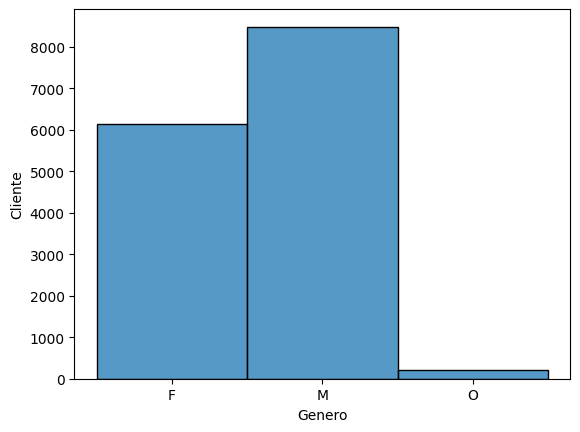

In [23]:
# ANALISANDO GRAFICAMENTE A DISTRIBUIÇÃO DOS GENEROS:

sns.histplot(dados_cliente['GENERO'],legend='GENERO')
plt.xlabel('Genero')
plt.ylabel('Cliente')
plt.show()

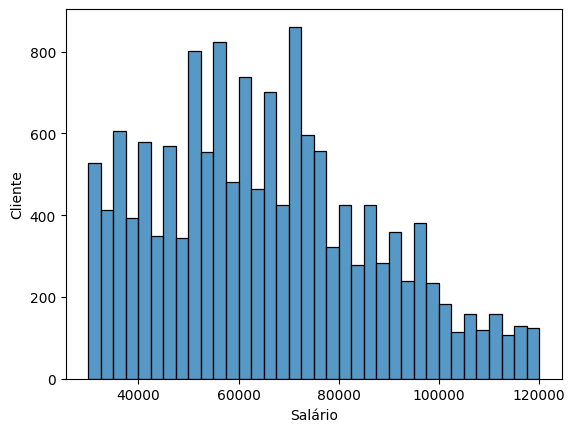

In [24]:
# ANALISANDO GRAFICAMENTE A DISTRIBUIÇÃO DAS RENDAS:

sns.histplot(dados_cliente['RENDA_ANUAL'],legend='RENDA_ANUAL')
plt.xlabel('Salário')
plt.ylabel('Cliente')
plt.show()

In [25]:
# ANALISANDO COMO SERÁ TRATADA OS NULOS
dados_cliente.loc[(dados_cliente['GENERO'].isnull())].head(15)

,GENERO,IDADE,ID_CLIENTE,DATA_MEMBRO,RENDA_ANUAL
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
9,NaN,118,8974fc5686fe429db53ddde067b88302,20161122,NaN
10,NaN,118,c4863c7985cf408faee930f111475da3,20170824,NaN
11,NaN,118,148adfcaa27d485b82f323aaaad036bd,20150919,NaN
17,NaN,118,744d603ef08c4f33af5a61c8c7628d1c,20170801,NaN
23,NaN,118,2b826eba31074a059d63b0ae8f50b7d5,20170907,NaN


In [26]:
dados_cliente_nulos = dados_cliente.loc[(dados_cliente['RENDA_ANUAL']).isnull()]

In [ ]:
dados_cliente_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENERO       0 non-null      object 
 1   IDADE        2175 non-null   int64  
 2   ID_CLIENTE   2175 non-null   object 
 3   DATA_MEMBRO  2175 non-null   int64  
 4   RENDA_ANUAL  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 102.0+ KB


In [27]:
# VERIFICANDO AS IDADES UNICAS

dados_cliente_nulos['IDADE'].unique()

array([118])

In [28]:
# VERIFICANDO OS ID UNICOS

dados_cliente_nulos['ID_CLIENTE'].unique()

array(['68be06ca386d4c31939f3a4f0e3dd783',
       '38fe809add3b4fcf9315a9694bb96ff5',
       'a03223e636434f42ac4c3df47e8bac43', ...,
       'ca45ee1883624304bac1e4c8a114f045',
       'a9a20fa8b5504360beb4e7c8712f8306',
       'c02b10e8752c4d8e9b73f918558531f7'], dtype=object)

In [29]:
dados_cliente_nulos.groupby(['DATA_MEMBRO']).count()['ID_CLIENTE']

# OBSERVAÇÃO: LOCALIZADO "ID" DUPLICADO PARA MESMA DATA DE REGISTRO

DATA_MEMBRO
20130802    1
20130810    1
20130824    2
20130920    1
20130924    1
           ..
20180721    3
20180722    3
20180723    1
20180725    2
20180726    1
Name: ID_CLIENTE, Length: 950, dtype: int64

Após analisar a base de dados de clientes, foi possível encontrar uma quantidade bem alta de registros com itens nulos em GENERO e RENDA, porém neste primeiro momento não realizarei nenhuma tratativa nestes casos, precisarei entender melhor a última base para analisar o que fazer com estes itens nulos. Não poderei desconsiderá-los neste momento, pois analisando foi possível verificar que os campos como REGISTRO e ID possuem valores não únicos, diferente da coluna IDADE que todos os registros estão "118". Talvez estes registros nulos pertençam a clientes reais que só não atualizaram seus dados no sistema da empresa, essa relação poderá gerar um relatório (***dados_cliente_nulos***) a mais para algum setor responsável pelo cadastros dos clientes analisar e atualizar os dados caso seja de interesse.

In [30]:
# VERIFICANDO OS ITENS DISPONÍVEIS NA BASE DE DADOS DOS EVENTOS/OFERTAS:

eventos_oferta.head(15)

,Unnamed: 0,cliente,tempo_decorrido,valor,id_oferta,recompensa,tipo_evento
0,1,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida
1,2,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
2,3,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida
3,4,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida
4,5,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida
5,6,389bc3fa690240e798340f5a15918d5c,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,oferta recebida
6,7,c4863c7985cf408faee930f111475da3,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,oferta recebida
7,8,2eeac8d8feae4a8cad5a6af0499a211d,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,oferta recebida
8,9,aa4862eba776480b8bb9c68455b8c2e1,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
9,10,31dda685af34476cad5bc968bdb01c53,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida


In [31]:
# VERIFICAND O TIPO DE DADOS E QUANTIDADE DE REGISTRO:

eventos_oferta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       306534 non-null  int64  
 1   cliente          306534 non-null  object 
 2   tempo_decorrido  306534 non-null  int64  
 3   valor            138953 non-null  float64
 4   id_oferta        167581 non-null  object 
 5   recompensa       33579 non-null   float64
 6   tipo_evento      306534 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ MB


In [32]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DA TABELA:

eventos_oferta.describe().astype(int)

,Unnamed: 0,tempo_decorrido,valor,recompensa
count,306534,306534,138953,33579
mean,153267,366,12,4
std,88488,200,30,2
min,1,0,0,2
25%,76634,186,2,2
50%,153267,408,8,5
75%,229900,528,18,5
max,306534,714,1062,10


In [33]:
# TEMOS UMA QUANTIDADE MUITA ALTA DE REGISTROS NULOS NESSA BASE DE DADOS, PRINCIPALMENTE EM RECOMPENSA:

round(100*eventos_oferta.isnull().sum().sort_values(ascending=True)/eventos_oferta.shape[0],2)

Unnamed: 0          0.00
cliente             0.00
tempo_decorrido     0.00
tipo_evento         0.00
id_oferta          45.33
valor              54.67
recompensa         89.05
dtype: float64

In [34]:
# VERIFICANDO A QUANTIDADE LINHAS E COLUNAS:

print(f'QUANTIDADE DE LINHAS {eventos_oferta.shape[0]} E DE {portfolio_oferta.shape[1]} COLUNAS')

# OBSERVAÇÃO: APARENTEMENTE OS CAMPOS NULOS EM GRANDE QUANTIDADE DEVE TER ALGUMA LIGAÇÃO COM A QUANTIDADE DE CLIENTES, PRECISAREMOS CONTINUAR A ANALISE PARA ENTENDER.

QUANTIDADE DE LINHAS 306534 E DE 6 COLUNAS


In [35]:
# EXCLUINDO A VARIÁVEL DE INDEX, POIS NÃO TERA NECESSIDADE NAS ANALISES:

eventos_oferta = eventos_oferta.drop(columns=['Unnamed: 0'])

In [36]:
eventos_oferta.head(15)

,cliente,tempo_decorrido,valor,id_oferta,recompensa,tipo_evento
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
2,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida
5,389bc3fa690240e798340f5a15918d5c,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,oferta recebida
6,c4863c7985cf408faee930f111475da3,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,oferta recebida
7,2eeac8d8feae4a8cad5a6af0499a211d,0,NaN,3f207df678b143eea3cee63160fa8bed,NaN,oferta recebida
8,aa4862eba776480b8bb9c68455b8c2e1,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida
9,31dda685af34476cad5bc968bdb01c53,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida


In [37]:
# RENOMEANDO AS LINHAS PARA UM PADRÃO QUE JÁ ESTOU ACOSTUMADO A USAR NAS VARIÁVEIS:

eventos_oferta = eventos_oferta.rename(columns={'cliente':'ID_CLIENTE',
                                              'tempo_decorrido':'TEMPO',
                                              'valor':'VALOR',
                                              'recompensa':'RECOMPENSA_EVENTOS',
                                              'id_oferta':'ID_OFERTA',
                                              'tipo_evento':'STATUS'
                                                    })

# OBSERVAÇÃO: AS VARIÁVEIS QUE SÃO "CHAVES" SERÃO USADAS PARA UNIR TODAS AS TABELAS

In [38]:
lista = [eventos_oferta.columns,portfolio_oferta.columns,dados_cliente.columns]

titulos = [x for x in lista]
print(f'\n{titulos}')


[Index(['ID_CLIENTE', 'TEMPO', 'VALOR', 'ID_OFERTA', 'RECOMPENSA_EVENTOS',
       'STATUS'],
      dtype='object'), Index(['RECOMPENSA', 'CANAL', 'VALOR_MINIMO', 'DURACAO', 'ID_OFERTA',
       'OFERTA'],
      dtype='object'), Index(['GENERO', 'IDADE', 'ID_CLIENTE', 'DATA_MEMBRO', 'RENDA_ANUAL'], dtype='object')]


In [39]:
# UNINDO A BASE DE OFERTAS PELA CHAVE ID RENOMEADA

base_dados = eventos_oferta.merge(portfolio_oferta, on = 'ID_OFERTA', how = 'left')

In [40]:
base_dados.head(5)

,ID_CLIENTE,TEMPO,VALOR,ID_OFERTA,RECOMPENSA_EVENTOS,STATUS,RECOMPENSA,CANAL,VALOR_MINIMO,DURACAO,OFERTA
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5.0,"['web', 'email', 'mobile']",5.0,7.0,"compre 1, leve 2"
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida,5.0,"['web', 'email']",20.0,10.0,desconto
2,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida,2.0,"['web', 'email', 'mobile']",10.0,7.0,desconto
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,desconto
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,"compre 1, leve 2"


In [41]:
# UNINDO A BASE DE CLIENTES PELA CHAVE ID RENOMEADA

base_dados_completa = base_dados.merge(dados_cliente, on = 'ID_CLIENTE', how = 'left')

In [42]:
base_dados_completa.head(5)

,ID_CLIENTE,TEMPO,VALOR,ID_OFERTA,RECOMPENSA_EVENTOS,STATUS,RECOMPENSA,CANAL,VALOR_MINIMO,DURACAO,OFERTA,GENERO,IDADE,DATA_MEMBRO,RENDA_ANUAL
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,oferta recebida,5.0,"['web', 'email', 'mobile']",5.0,7.0,"compre 1, leve 2",F,75,20170509,100000.0
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,oferta recebida,5.0,"['web', 'email']",20.0,10.0,desconto,NaN,118,20170804,NaN
2,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,oferta recebida,2.0,"['web', 'email', 'mobile']",10.0,7.0,desconto,M,68,20180426,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,oferta recebida,2.0,"['web', 'email', 'mobile', 'social']",10.0,10.0,desconto,NaN,118,20170925,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,oferta recebida,10.0,"['web', 'email', 'mobile', 'social']",10.0,5.0,"compre 1, leve 2",NaN,118,20171002,NaN


In [43]:
base_dados_completa['STATUS'].unique()

array(['oferta recebida', 'oferta visualizada', 'transacao',
       'oferta concluída'], dtype=object)

In [44]:
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([0,  6, 12, 18],24) # SERÁ 1 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([30, 36, 42],48) # SERÁ 2 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([54, 60, 66],72) # SERÁ 3 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([78, 84, 90],96) # SERÁ 4 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([102, 108, 114],120) # SERÁ 5 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([126, 132, 138],144) # SERÁ 6 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([150, 156, 162],168) # SERÁ 7 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([174, 180, 186],192) # SERÁ 8 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([198, 204, 210],216) # SERÁ 9 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([222, 228, 234],240) # SERÁ 10 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([246, 252, 258, 264,
270, 276, 282, 288, 294, 300, 306, 312, 318, 324, 330, 336, 342, 348, 354],360) # SERÁ 11 A 15 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([366, 372, 378, 384,
390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462, 468, 474],480) # SERÁ 16 A 20 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([486, 492, 498,
504, 510, 516, 522, 528, 534, 540, 546, 552, 558, 564, 570, 576, 582, 588, 594],600) # SERÁ 21 A 25 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([606, 612, 618,
624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696],714) # SERÁ 26 A 30 DIA (SERÁ MENOS DE 30 DIAS)

In [45]:
base_dados_completa['TEMPO'].unique()

array([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240, 360, 480, 600,
       714, 702, 708])

In [46]:
base_dados_completa['CANAL'].unique()

array(["['web', 'email', 'mobile']", "['web', 'email']",
       "['web', 'email', 'mobile', 'social']",
       "['email', 'mobile', 'social']", nan], dtype=object)

In [47]:
# OS ITENS DE CANAIS POSSUI MUITAS COISAS JUNTAS, NÃO SERÁ POSSÍVEL AGRUPAR DEVIDO CADA UM POSSUIR UM ITEM DIFERENTE, REALIZAREI APENAS A APREVIAÇÃO DOS NOMES

atualizacao_dados = {
                      "STATUS":
                       {"oferta recebida":"Recebida",
                        "oferta visualizada":"Visualizada",
                        "transacao":"Transação",
                        "oferta concluída":"Concluída"},
                      "CANAL":{
                        "['web', 'email', 'mobile']":"W-E-M",
                        "['web', 'email']":"W-E",
                        "['web', 'email', 'mobile', 'social']":"W-E-M-S",
                        "['email', 'mobile', 'social']":"E-M-S",
                        np.nan:"Não_Disponível"}
                        }

base_dados_completa = base_dados_completa.replace(atualizacao_dados)

In [48]:
base_dados_completa['CANAL'].unique()

array(['W-E-M', 'W-E', 'W-E-M-S', 'E-M-S', 'Não_Disponível'], dtype=object)

Finalizando a união das bases, trabalharei as analises em uma base única considerando as regras solicitada para apresentação final. A variável escolhida para ser meu alvo (Target) será a de "STATUS", utilizarei ela para entender onde a empresa obteve melhores resultados.

In [49]:
# VERIFICANDO AS INFORMAÇÕES ESTATÍSTICAS DA BASE COMPLETA:

base_dados_completa.describe().astype(int)

,TEMPO,VALOR,RECOMPENSA_EVENTOS,RECOMPENSA,VALOR_MINIMO,DURACAO,IDADE,DATA_MEMBRO,RENDA_ANUAL
count,306534,138953,33579,167581,167581,167581,306534,306534,272762
mean,407,12,4,4,7,6,60,20165446,64337
std,217,30,2,3,5,2,26,11904,21243
min,24,0,2,0,0,3,18,20130729,30000
25%,192,2,2,2,5,5,43,20160322,48000
50%,480,8,5,5,10,7,57,20170413,62000
75%,600,18,5,5,10,7,72,20171126,78000
max,714,1062,10,10,20,10,118,20180726,120000


In [50]:
# VERIFICANDO A PORCENTAGEM DE REGISTROS NULOS APÓS UNIÃO DAS BASES:

round(100*base_dados_completa.isnull().sum().sort_values(ascending=True)/base_dados_completa.shape[0],2)

ID_CLIENTE             0.00
TEMPO                  0.00
STATUS                 0.00
CANAL                  0.00
IDADE                  0.00
DATA_MEMBRO            0.00
GENERO                11.02
RENDA_ANUAL           11.02
ID_OFERTA             45.33
RECOMPENSA            45.33
VALOR_MINIMO          45.33
DURACAO               45.33
OFERTA                45.33
VALOR                 54.67
RECOMPENSA_EVENTOS    89.05
dtype: float64

Para evitar erros na geração dos dados geralmente É aconselhável tratarmos todos os valores NaN das colunas, considerando que a coluna de CLIENTE não possui vazios, podemos entender que as ofertas foram enviadas para toda a base existente, então vou manter a base sem essas mudanças é nas variáveis qualitativas necessárias vou atribuir o "Não Disponível" para as colunas NaN.

In [51]:
# CASO NECESSÁRIO, PODEMOS ANALISAR AS TABELAS TRATADAS PELAS VARIÁVEIS CRIADAS:

variaveis_qualitativas_tratadas = base_dados_completa.replace({
                                                            "GENERO":{np.nan:"Não_Disponível"},
                                                            "ID_OFERTA":{np.nan:"Não_Disponível"},
                                                            "CANAL":{np.nan:"Não_Disponível"},
                                                            "OFERTA":{np.nan:"Não_Disponível"}
                                                            })

variaveis_quantitativas_tratadas = base_dados_completa.replace({
                                                            "RENDA_ANUAL":{np.nan:0},
                                                            "RECOMPENSA":{np.nan:0},
                                                            "VALOR_MINIMO":{np.nan:0},
                                                            "DURACAO":{np.nan:0},
                                                            "VALOR":{np.nan:0},
                                                            "RECOMPENSA_EVENTOS":{np.nan:0}
                                                            })

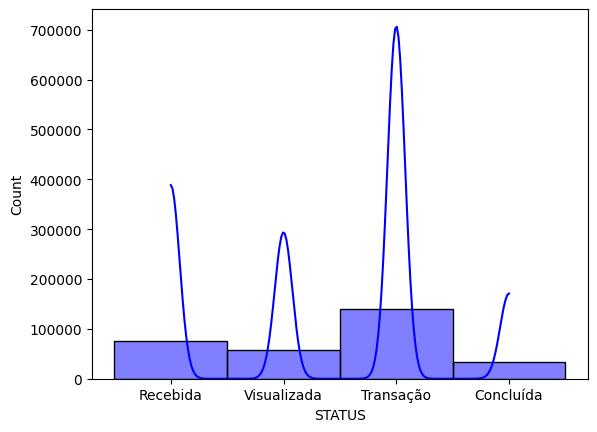

In [52]:
# ANALISANDO NOSSO TARGET FOI POSSÍVEL IDENTIFICAR QUE QUASE METADE DAS OFERTAS ENVIADAS ESTÃO EM TRANSAÇÃO (FORAM VENDIDAS)

sns.histplot(base_dados_completa['STATUS'], color='b' , kde=True)
plt.show()

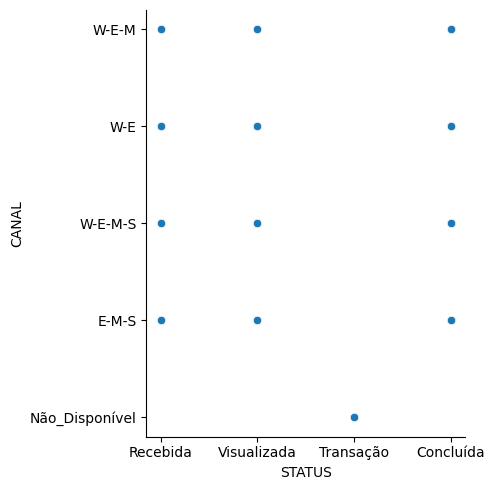

In [53]:
sns.relplot(base_dados_completa, y='CANAL', x='STATUS')
plt.show()

In [54]:
# ANALISANDO OS STATUS DA OFERTA E OS CANAIS DE DIVULGAÇÃO

base_dados_completa.groupby(['STATUS'])['CANAL'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: O ITEM "TRANSAÇÃO" NÃO ESTÁ EM NENHUM MEIO DE COMUNICAÇÃO DOS DIVULGADOS,
# OBSERVAÇÃO: O MEIO DE COMUNICAÇÃO MAIS PRESENTE É O QUE POSSUI OS 4 ITENS (W-E-M-S)

,count,unique,top,freq
STATUS,,,,
Concluída,33579,4,W-E-M-S,18100
Recebida,76277,4,W-E-M-S,30407
Transação,138953,1,Não_Disponível,138953
Visualizada,57725,4,W-E-M-S,29226


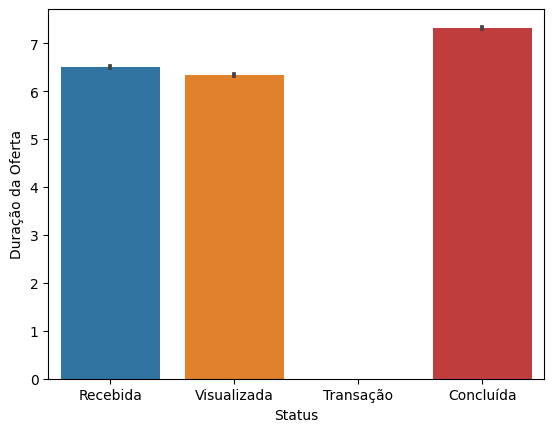

In [55]:
sns.barplot(base_dados_completa, y='DURACAO', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Duração da Oferta')
plt.show()

In [56]:
# ANALISANDO OS STATUS DA OFERTA E TEMPO DE DURAÇÃO

base_dados_completa.groupby(['STATUS'])['DURACAO'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: O PRAZO MINIMO PARA UMA OFERTA SER CONCLUÍDA É DE 5 DIAS, O TEMPO MÉDIO É 7 DIAS E ENTRE 75% A 99% DAS VEZES OCORRE ENTRE 10 DIAS
# OPNIÃO: A OFERTA É VISUALIZADA E RECEBIDA EM NO MINIMO 3 DIAS, MAS POR QUEM? É NECESSÁRIO DETALHAR MAIS O QUE SERIA ESSES DOIS STATUS, POIS ESTÁ CONFUSO.
# OBSERVAÇÃO: O PRAZO MÁXIMO DE TODAS OFERTAS É DE 10 DIAS, MAS DIFERENTE DA "CONCLUÍDA" EM 75% DOS CASO AS OFERTAS RECEBIDAS E VISUALIZADAS AINDA ESTÃO COM 7 DIAS.
# OBSERVAÇÃO: DENTRE AS 03 OFERTAS ANALISADAS NENHUMA POSSUI TEMPO INFERIOR A 3 DIAS.

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,7.326305,1.773103,5.0,5.0,7.0,7.0,10.0,10.0,10.0
Recebida,76277.0,6.503704,2.201544,3.0,3.0,5.0,7.0,7.0,10.0,10.0
Transação,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visualizada,57725.0,6.335920,2.150644,3.0,3.0,5.0,7.0,7.0,10.0,10.0


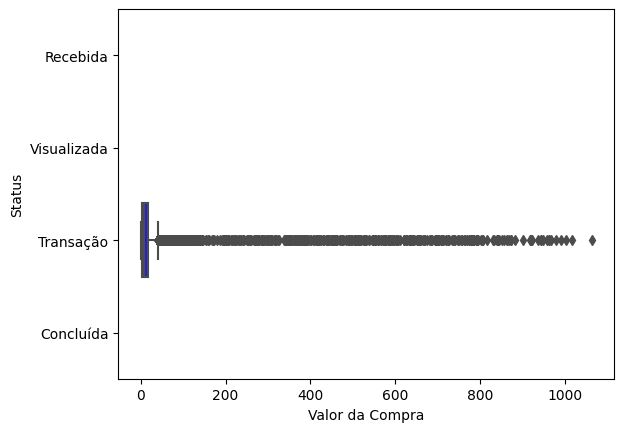

In [57]:
sns.boxplot(base_dados_completa, y='STATUS', x='VALOR', color='b')
plt.xlabel('Valor da Compra')
plt.ylabel('Status')
plt.show()

In [58]:
# ANALISANDO OS STATUS DA OFERTA E VALOR GASTO NA COMPRA

base_dados_completa.groupby(['STATUS'])['VALOR'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: POSSUÍMOS VALOR APENAS NO ITEM "TRANSAÇÃO", ENTÃO É POSSÍVEL ENTENDER QUE ESSE STATUS É DE UMA OFERTA "VENDIDA"
# OBSERVAÇÃO: O MENOR VALOR VENDIDO É DE R$0,05 CENTAVOS E O MAIOR DE R$1062,28 REAIS, PORÉM A MAIORIA DAS COMPRAS (50%) É NA MÉDIA DE R$8,89 REAIS
# OBSERVAÇÃO: TIVEMOS 138953 OFERTAS "VENDIDAS"

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recebida,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transação,138953.0,12.777356,30.250529,0.05,0.15,2.78,8.89,18.07,40.0196,1062.28
Visualizada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


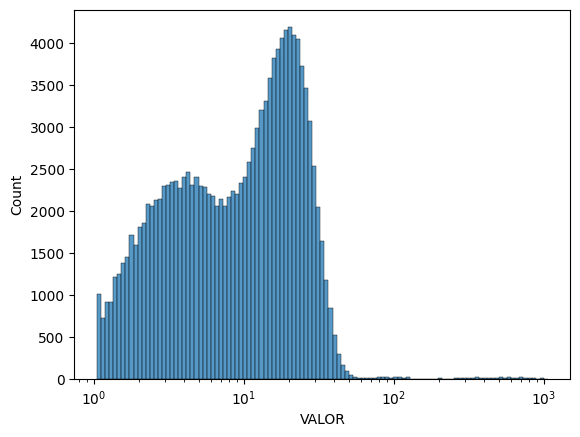

In [59]:
fig, ax = plt.subplots()
ax.set(xscale="log")
sns.histplot(data=base_dados_completa.VALOR, x=(base_dados_completa.VALOR+1))
plt.show()

In [60]:
print(f"O MAIOR VALOR VENDIDO FOI DE: R${base_dados_completa['VALOR'].max()}")

O MAIOR VALOR VENDIDO FOI DE: R$1062.28


In [61]:
# ANALISANDO OS STATUS DA OFERTA E TEMPO DECORRIDO DESDE O ENVIO

base_dados_completa.groupby(['STATUS'])['TEMPO'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,444.753864,209.760776,24.0,24.0,240.0,480.0,600.0,714.0,714.0
Recebida,76277.0,372.625982,215.248774,24.0,24.0,168.0,480.0,600.0,600.0,600.0
Transação,138953.0,424.024901,217.969610,24.0,24.0,216.0,480.0,600.0,714.0,714.0
Visualizada,57725.0,393.422053,218.205718,24.0,24.0,192.0,480.0,600.0,714.0,714.0


In [62]:
# O REGISTRO DE TEMPO É POSSÍVEL VISUALIZAR AS "TRANSAÇÕES", ENTÃO OBTEI EM AGRUPA-LOS PARA DEPOIS CONVERTER-LO EM DIAS

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([0,  6, 12, 18],24) # SERÁ 1 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([30, 36, 42],48) # SERÁ 2 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([54, 60, 66],72) # SERÁ 3 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([78, 84, 90],96) # SERÁ 4 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([102, 108, 114],120) # SERÁ 5 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([126, 132, 138],144) # SERÁ 6 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([150, 156, 162],168) # SERÁ 7 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([174, 180, 186],192) # SERÁ 8 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([198, 204, 210],216) # SERÁ 9 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([222, 228, 234],240) # SERÁ 10 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([246, 252, 258, 264,
270, 276, 282, 288, 294, 300, 306, 312, 318, 324, 330, 336, 342, 348, 354],360) # SERÁ 11 A 15 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([366, 372, 378, 384,
390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462, 468, 474],480) # SERÁ 16 A 20 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([486, 492, 498,
504, 510, 516, 522, 528, 534, 540, 546, 552, 558, 564, 570, 576, 582, 588, 594],600) # SERÁ 21 A 25 DIA

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([606, 612, 618,
624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696, 702, 708],714) # SERÁ 26 A 30 DIA (SERÁ MENOS DE 30 DIAS)

In [63]:
base_dados_completa['TEMPO'].unique()

array([ 24,  48,  72,  96, 120, 144, 168, 192, 216, 240, 360, 480, 600,
       714])

In [64]:
# CONVERTENDO TEMPO DE HORAS PARA DIAS:

base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([24],1) # SERÁ 1 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([48],2) # SERÁ 2 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([72],3) # SERÁ 3 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([96],4) # SERÁ 4 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([120],5) # SERÁ 5 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([144],6) # SERÁ 6 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([168],7) # SERÁ 7 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([192],8) # SERÁ 8 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([216],9) # SERÁ 9 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([240],10) # SERÁ 10 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([360],15) # SERÁ 11 A 15 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([480],20) # SERÁ 16 A 20 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([600],25) # SERÁ 21 A 25 DIA
base_dados_completa['TEMPO'] = base_dados_completa['TEMPO'].replace([714],30) # SERÁ 26 A 30 DIA (SERÁ MENOS DE 30 DIAS)

In [65]:
base_dados_completa['TEMPO'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 15, 20, 25, 30])

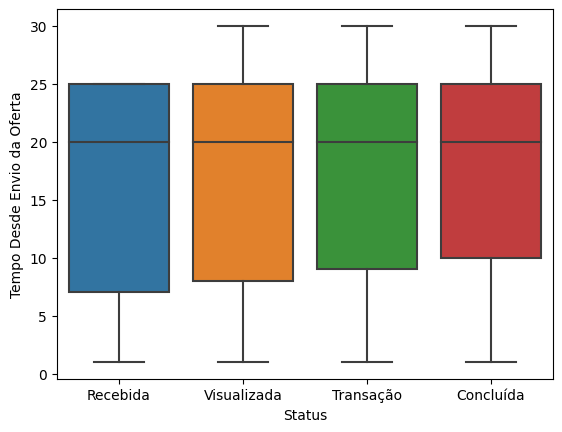

In [66]:
# ANALISANDO OS STATUS DA OFERTA E TEMPO DECORRIDO DESDE O ENVIO (APÓS TRATAMENTO)

sns.boxplot(base_dados_completa, y='TEMPO', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Tempo Desde Envio da Oferta')
plt.show()

In [67]:
base_dados_completa.groupby(['STATUS'])['TEMPO'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: O TEMPO MÉDIO PARA UMA COMPRA SER REALIZADA É DE 16 A 20 DIAS, E EM APENAS 25% DAS VEZES OCORRE EM MENOS DE 9 DIAS
# OBSERVAÇÃO: O TEMPO MÉDIO PARA SER VISUALIZADA TAMBÉM É DE 16 A 20 DIAS, O QUE CORRESPONDE COM O TEMPO DA COMPRA.

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,18.569433,8.789077,1.0,1.0,10.0,20.0,25.0,30.0,30.0
Recebida,76277.0,15.526083,8.968699,1.0,1.0,7.0,20.0,25.0,25.0,25.0
Transação,138953.0,17.714868,9.144934,1.0,1.0,9.0,20.0,25.0,30.0,30.0
Visualizada,57725.0,16.409788,9.117335,1.0,1.0,8.0,20.0,25.0,30.0,30.0


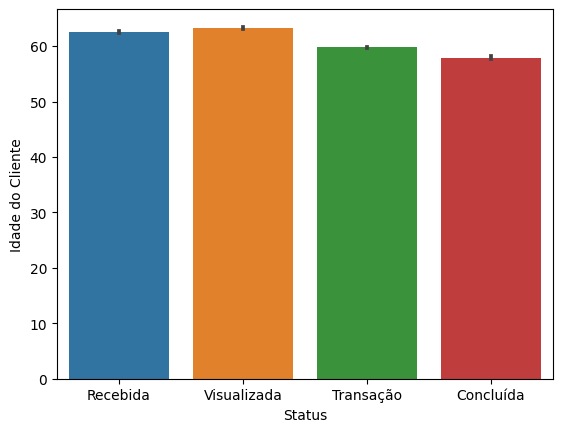

In [68]:
# ANALISANDO OS STATUS DA OFERTA E IDADE DOS CLIENTES

sns.barplot(base_dados_completa, y='IDADE', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Idade do Cliente')
plt.show()

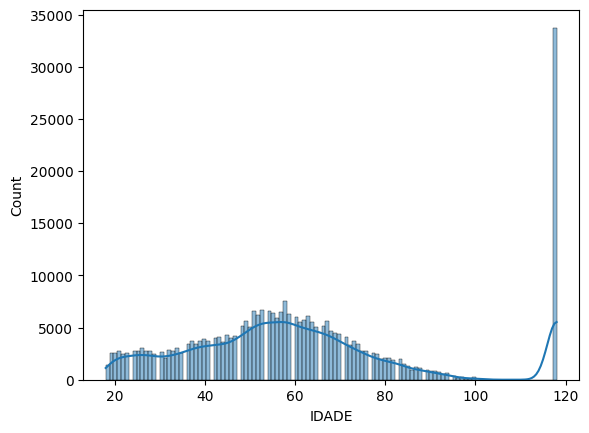

In [69]:
sns.histplot(base_dados_completa['IDADE'], kde=True)
plt.show()

# OBSERVAÇÃO: CONFORME PONTUADO ANTES, TEMOS UMA QUANTIDADE MUITA ALTA DE REGISTRO COM IDADE FORA DO NORMAL

In [70]:
base_dados_completa.groupby(['STATUS'])['IDADE'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: A MAIORIA DAS VENDAS OCORRE ENTRE PESSOAS DE 56 ANOS
# OBSERVAÇÃO: AS IDADEs POSSUEM PONTOS MUITO DISCREPANTES (OUTLIERS), COMO PONTUADO EM ANALISES ANTERIORES

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,57.928140,19.981273,18.0,20.0,46.0,57.0,68.0,118.0,118.0
Recebida,76277.0,62.524457,26.762620,18.0,19.0,45.0,58.0,73.0,118.0,118.0
Transação,138953.0,59.759725,26.389269,18.0,19.0,41.0,56.0,71.0,118.0,118.0
Visualizada,57725.0,63.276778,26.948201,18.0,19.0,46.0,59.0,74.0,118.0,118.0


In [71]:
base_dados_completa.groupby(['CANAL'])['IDADE'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: A MAIOR MÉDIA DO USO DOS CANAIS DE VENDAS É PELAS PESSOAS DE FAIXA ETARIA ENTRE 56 A 58 ANOS

,count,mean,std,min,1%,25%,50%,75%,99%,max
CANAL,,,,,,,,,,
E-M-S,32367.0,61.483795,25.834107,18.0,19.0,45.0,58.0,72.0,118.0,118.0
Não_Disponível,138953.0,59.759725,26.389269,18.0,19.0,41.0,56.0,71.0,118.0,118.0
W-E,13751.0,61.908661,24.758536,18.0,20.0,47.0,58.0,72.0,118.0,118.0
W-E-M,43730.0,62.550560,25.866048,18.0,20.0,46.0,58.0,73.0,118.0,118.0
W-E-M-S,77733.0,61.625191,25.692079,18.0,19.0,45.0,58.0,72.0,118.0,118.0


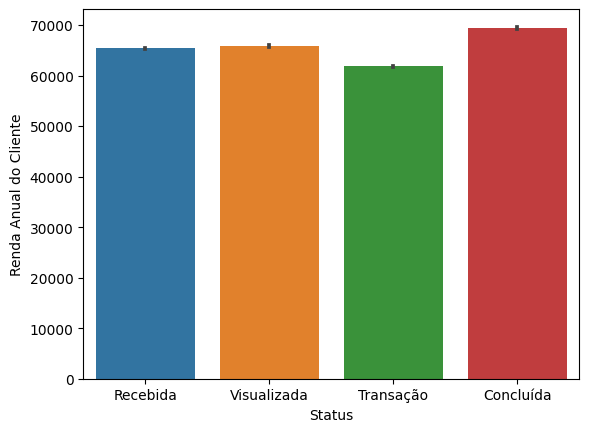

In [72]:
# ANALISANDO OS STATUS DA OFERTA E RENDA DOS CLIENTES

sns.barplot(base_dados_completa, y='RENDA_ANUAL', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Renda Anual do Cliente')
plt.show()

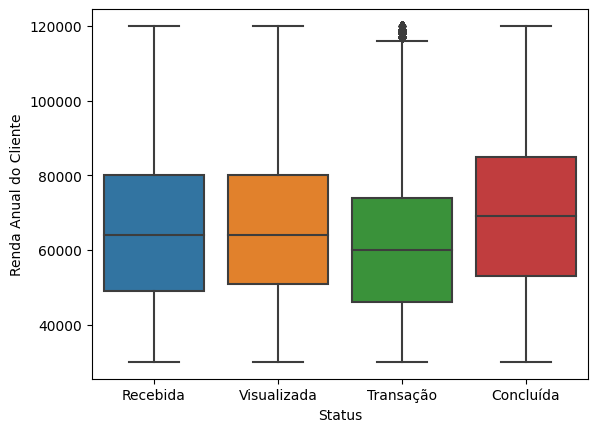

In [73]:
sns.boxplot(base_dados_completa, y='RENDA_ANUAL', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Renda Anual do Cliente')
plt.show()

<Axes: xlabel='RENDA_ANUAL', ylabel='Count'>

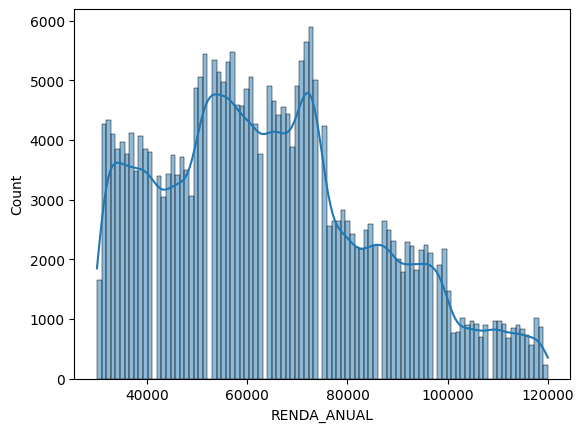

In [74]:
sns.histplot(base_dados_completa['RENDA_ANUAL'], kde=True)

In [75]:
base_dados_completa.groupby(['STATUS'])['RENDA_ANUAL'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: A MÉDIA DE RENDA ENTRE A MAIORIA DOS CLIENTES É R$60.000,00 A R$69.000,00 REAIS, SENDO QUE ENTRE COMPRADORES É R$60.000,00

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,32444.0,69430.803847,21604.250324,30000.0,31000.0,53000.0,69000.0,85000.0,118000.0,120000.0
Recebida,66501.0,65371.618472,21623.288473,30000.0,31000.0,49000.0,64000.0,80000.0,117000.0,120000.0
Transação,123957.0,61843.510250,20661.890394,30000.0,31000.0,46000.0,60000.0,74000.0,116000.0,120000.0
Visualizada,49860.0,65841.596470,21075.168266,30000.0,31000.0,51000.0,64000.0,80000.0,116000.0,120000.0


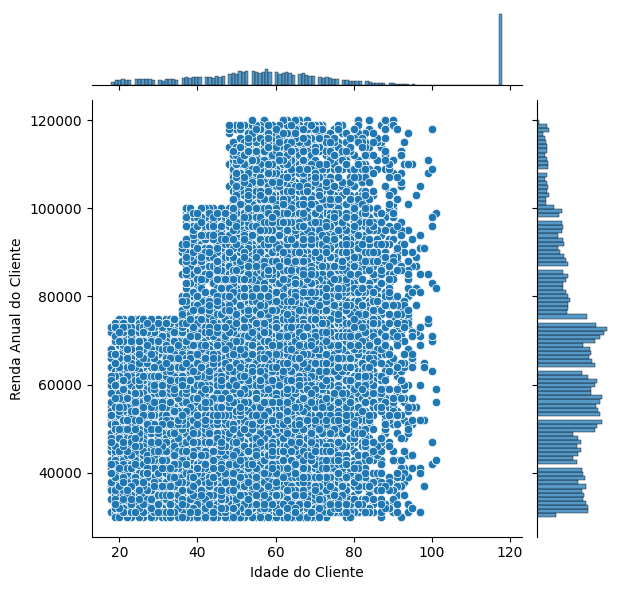

In [76]:
# ANALISANDO A IDADE E RENDA DOS CLIENTES

sns.jointplot(base_dados_completa, y='RENDA_ANUAL', x='IDADE')
plt.xlabel('Idade do Cliente')
plt.ylabel('Renda Anual do Cliente')
plt.show()

In [77]:
base_dados_completa.groupby(['IDADE'])['RENDA_ANUAL'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: DEVIDO A QUANTIDADE DE INFORMAÇÃO, NÃO CONSIDERO ESSA COMPARAÇÃO INTERESSANTE PARA TIRAR INSIGHTS

,count,mean,std,min,1%,25%,50%,75%,99%,max
IDADE,,,,,,,,,,
18,1367.0,49948.792977,10930.782340,31000.0,31000.0,41000.0,49000.0,56000.0,73000.0,73000.0
19,2595.0,50787.283237,13305.186210,30000.0,30000.0,39000.0,52000.0,61000.0,74000.0,74000.0
20,2582.0,50929.899303,13869.127489,30000.0,30000.0,39000.0,49000.0,63000.0,75000.0,75000.0
21,2762.0,50054.308472,12805.567618,31000.0,31000.0,39000.0,47000.0,60000.0,74000.0,75000.0
22,2430.0,49452.674897,12307.037713,30000.0,31000.0,38000.0,49000.0,57000.0,73000.0,74000.0
...,...,...,...,...,...,...,...,...,...,...
98,85.0,57470.588235,17371.013236,37000.0,37000.0,52000.0,52000.0,65000.0,91000.0,91000.0
99,99.0,93282.828283,16376.962667,74000.0,74000.0,75000.0,85000.0,111000.0,111000.0,111000.0
100,234.0,76641.025641,23182.041865,42000.0,42000.0,63000.0,71000.0,98000.0,118000.0,118000.0


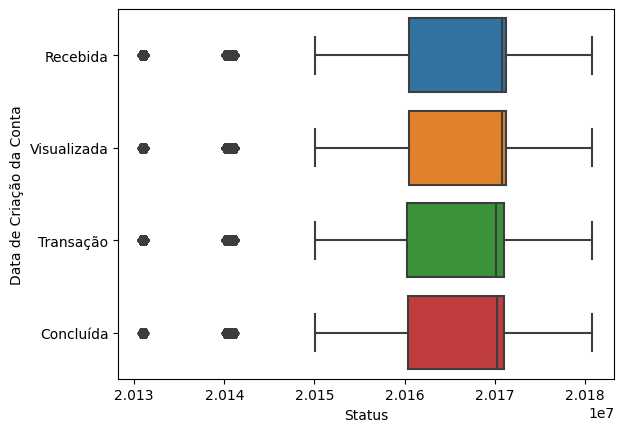

In [78]:
# ANALISANDO O STATUS E TEMPO QUE O CLIENTE É MEMBRO:

sns.boxplot(base_dados_completa, y='STATUS', x='DATA_MEMBRO')
plt.xlabel('Status')
plt.ylabel('Data de Criação da Conta')
plt.show()

<Axes: xlabel='DATA_MEMBRO', ylabel='Count'>

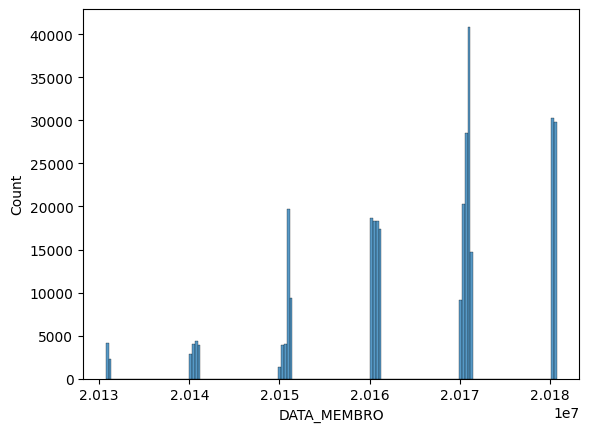

In [79]:
sns.histplot(base_dados_completa['DATA_MEMBRO'])

In [80]:
base_dados_completa['DATA_MEMBRO'].unique()

# OBSERVAÇÃO: PODERIAMOS TRATAR A DATA ATRIBUINDO APENAS OS "ANOS", MAS COMO JÁ FOI POSSÍVEL VISUALIZAR OS ANOS SEPARADOS NO GRÁFICO NÃO REALIZAREI TRATAMENTO

array([20170509, 20170804, 20180426, ..., 20140113, 20130826, 20140422])

In [81]:
base_dados_completa.groupby(['STATUS'])['DATA_MEMBRO'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: O PRIMEIRO CADASTRO DE MEMBRO OCORREU EM 2013, A MAIORIA DOS MEMBROS CRIARAM CONTAS EM 2017 E AS ÚLTIMAS OCORREM EM 2018

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,2.016496e+07,11170.065286,20130729.0,20131021.00,20160320.0,20170216.0,20171027.0,20180712.0,20180726.0
Recebida,76277.0,2.016705e+07,11688.180520,20130729.0,20131022.76,20160525.0,20170802.0,20171230.0,20180718.0,20180726.0
Transação,138953.0,2.016404e+07,12099.806393,20130729.0,20130924.00,20160202.0,20170125.0,20171023.0,20180713.0,20180726.0
Visualizada,57725.0,2.016700e+07,11675.849991,20130729.0,20131023.00,20160522.0,20170801.0,20171229.0,20180718.0,20180726.0


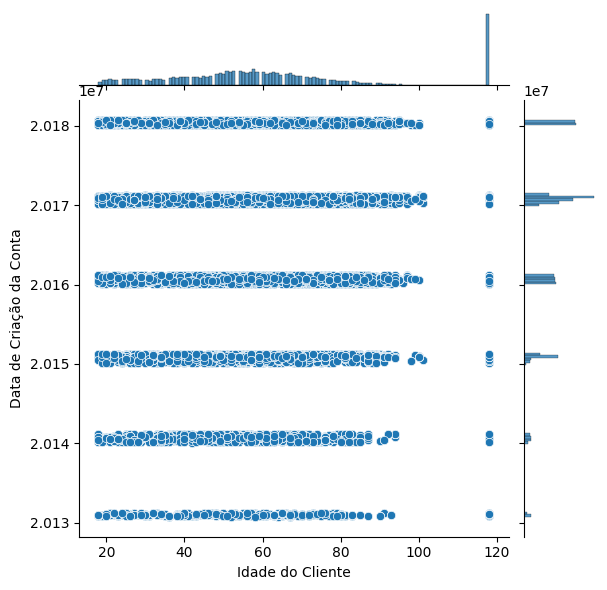

In [82]:
sns.jointplot(base_dados_completa, y='DATA_MEMBRO', x='IDADE')
plt.xlabel('Idade do Cliente')
plt.ylabel('Data de Criação da Conta')
plt.show()

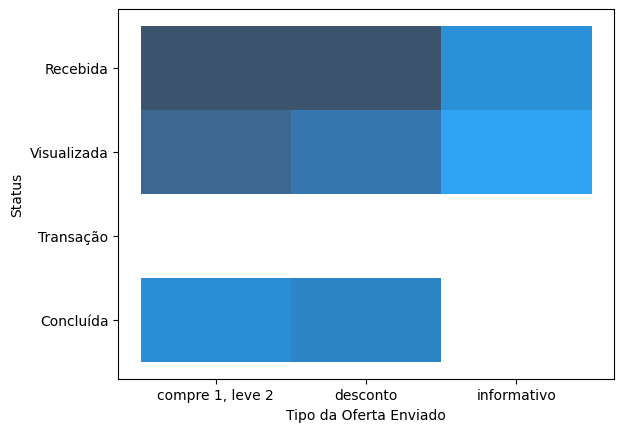

In [83]:
# ANALISANDO OS STATUS DA OFERTA E AS OFERTAS QUE SÃO ENVIADAS

sns.histplot(base_dados_completa, y='STATUS', x='OFERTA')
plt.xlabel('Tipo da Oferta Enviado')
plt.ylabel('Status')
plt.show()

<Axes: xlabel='OFERTA', ylabel='Count'>

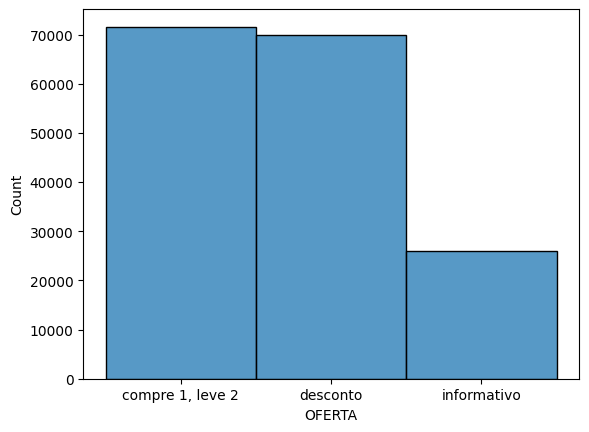

In [84]:
sns.histplot(base_dados_completa['OFERTA'])

In [85]:
base_dados_completa.groupby(['STATUS'])['OFERTA'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: NÃO TEMOS REGISTRO DE "TRANSAÇÃO" VINCULADAS AO TIPO DE "OFERTAS" ENVIADO AO CLIENTE
# OBSERVAÇÃO: A "OFERTA" MAIS VISUALIZADA É A DE "COMPRE 1, LEVE 2"

,count,unique,top,freq
STATUS,,,,
Concluída,33579,2,desconto,17910
Recebida,76277,3,desconto,30543
Transação,0,0,NaN,NaN
Visualizada,57725,3,"compre 1, leve 2",25449


In [86]:
base_dados_completa.groupby(['OFERTA'])['VALOR'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: NÃO TEMOS REGISTRO DE "VALOR" VINCULADAS AO TIPO DE "OFERTAS" COMPRADAS PELO CLIENTE

,count,mean,std,min,1%,25%,50%,75%,99%,max
OFERTA,,,,,,,,,,
"compre 1, leve 2",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
desconto,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
informativo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


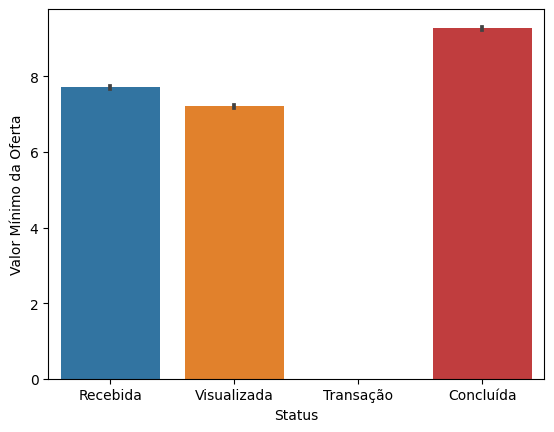

In [87]:
sns.barplot(base_dados_completa, y='VALOR_MINIMO', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Valor Mínimo da Oferta')
plt.show()

In [88]:
base_dados_completa.groupby(['STATUS'])['VALOR_MINIMO'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÃO: COMO NÃO POSSUÍMOS VINCULO DE "TRANSAÇÕES" ENTRE AS OFERTAS, TAMBÉM NÃO TEMOS REGISTRO DE VALOR MÍNIMO PARA ELAS EM "TRANSAÇÃO"

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,9.269841,4.180227,5.0,5.0,5.0,10.0,10.0,20.0,20.0
Recebida,76277.0,7.707723,5.538203,0.0,0.0,5.0,10.0,10.0,20.0,20.0
Transação,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visualizada,57725.0,7.213235,4.659072,0.0,0.0,5.0,7.0,10.0,20.0,20.0


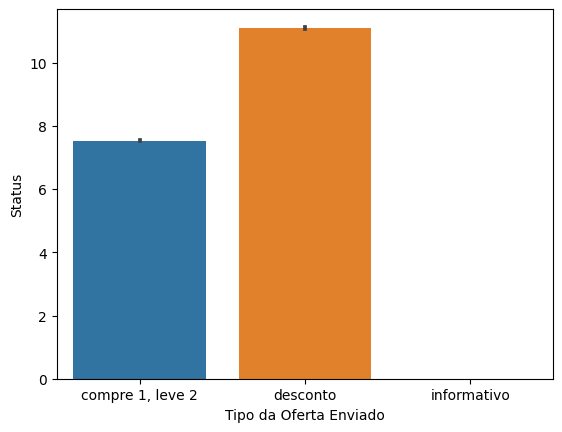

In [89]:
sns.barplot(base_dados_completa, y='VALOR_MINIMO', x='OFERTA')
plt.xlabel('Tipo da Oferta Enviado')
plt.ylabel('Status')
plt.show()

In [90]:
base_dados_completa.groupby(['OFERTA'])['VALOR_MINIMO'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,mean,std,min,1%,25%,50%,75%,99%,max
OFERTA,,,,,,,,,,
"compre 1, leve 2",71617.0,7.533197,2.499797,5.0,5.0,5.0,10.0,10.0,10.0,10.0
desconto,69898.0,11.102936,4.588013,7.0,7.0,7.0,10.0,10.0,20.0,20.0
informativo,26066.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


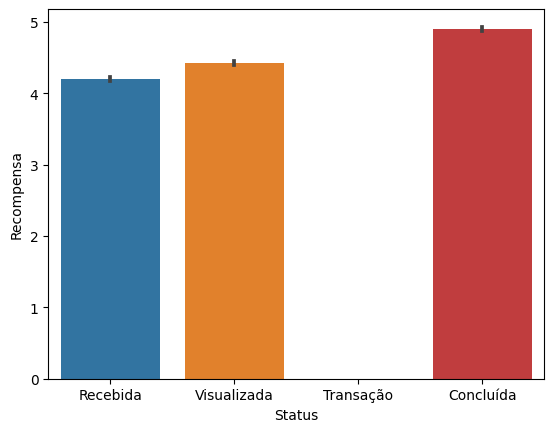

In [91]:
# ANALISANDO OS STATUS DA OFERTA E AS VARIAVÉIS FINAIS DE RECOMPENSA

sns.barplot(base_dados_completa, y='RECOMPENSA', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Recompensa')
plt.show()

<Axes: xlabel='RECOMPENSA', ylabel='Count'>

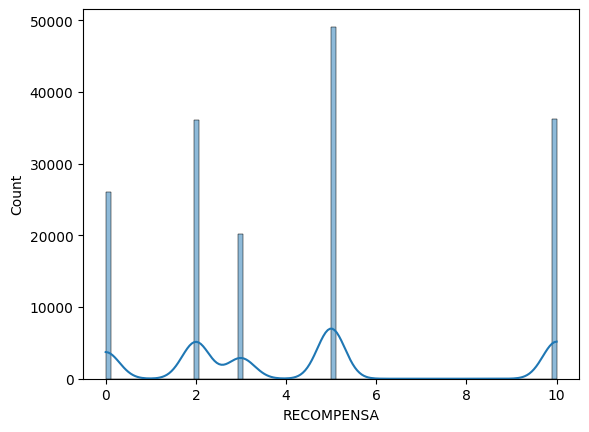

In [92]:
sns.histplot(base_dados_completa['RECOMPENSA'], kde=True)

In [94]:
base_dados_completa.groupby(['STATUS'])['RECOMPENSA'].describe(percentiles = [.01, .25, .5, .75, .99])

# OBSERVAÇÕES/DÚVIDA: AS RECOMPENSAS NÃO GERARAM NENHUM REGISTRO PARA "TRANSAÇÕES", OU SERIA PARA O STATUS "CONCLUÍDO"?

,count,mean,std,min,1%,25%,50%,75%,99%,max
STATUS,,,,,,,,,,
Concluída,33579.0,4.904137,2.886647,2.0,2.0,2.0,5.0,5.0,10.0,10.0
Recebida,76277.0,4.201607,3.398888,0.0,0.0,2.0,5.0,5.0,10.0,10.0
Transação,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visualizada,57725.0,4.426696,3.567132,0.0,0.0,2.0,3.0,5.0,10.0,10.0


In [95]:
base_dados_completa.groupby(['RECOMPENSA'])['ID_CLIENTE'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,unique,top,freq
RECOMPENSA,,,,
0.0,26066,10547,6dba14f698ae4030ab7354cd5cfe7119,10
2.0,36008,10482,eab78e2cf26f4af494d9535ac3835f00,17
3.0,20139,6325,1c8cf4af93464dcaa971cfcffc2cc1e5,12
5.0,49084,13326,4b72995c52ab4cd5ab407924b09e1ab4,17
10.0,36284,10586,d3209835a40a423fbf2c967218d00bcd,15


In [96]:
base_dados_completa.groupby(['OFERTA'])['ID_CLIENTE'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,unique,top,freq
OFERTA,,,,
"compre 1, leve 2",71617,14992,1acb3e87e3304271a3c917cc80a53780,18
desconto,69898,14945,eab78e2cf26f4af494d9535ac3835f00,17
informativo,26066,10547,6dba14f698ae4030ab7354cd5cfe7119,10


In [97]:
base_dados_completa.groupby(['RECOMPENSA'])['VALOR'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,mean,std,min,1%,25%,50%,75%,99%,max
RECOMPENSA,,,,,,,,,,
0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


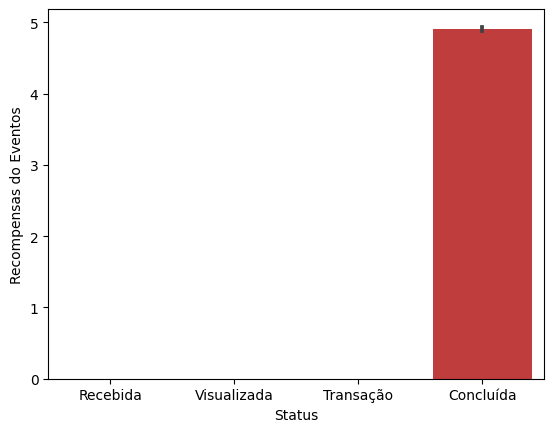

In [98]:
# ANALISANDO OS STATUS DA OFERTA E RENDA DOS CLIENTES

sns.barplot(base_dados_completa, y='RECOMPENSA_EVENTOS', x='STATUS')
plt.xlabel('Status')
plt.ylabel('Recompensas do Eventos')
plt.show()

In [99]:
base_dados_completa.groupby(['RECOMPENSA_EVENTOS'])['STATUS'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,unique,top,freq
RECOMPENSA_EVENTOS,,,,
2.0,9334,1,Concluída,9334
3.0,5156,1,Concluída,5156
5.0,12070,1,Concluída,12070
10.0,7019,1,Concluída,7019


In [100]:
base_dados_completa.groupby(['RECOMPENSA_EVENTOS'])['VALOR'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,mean,std,min,1%,25%,50%,75%,99%,max
RECOMPENSA_EVENTOS,,,,,,,,,,
2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
base_dados_completa.groupby(['RECOMPENSA_EVENTOS'])['ID_CLIENTE'].describe(percentiles = [.01, .25, .5, .75, .99])

,count,unique,top,freq
RECOMPENSA_EVENTOS,,,,
2.0,9334,6940,eab78e2cf26f4af494d9535ac3835f00,6
3.0,5156,4421,281d463f31e74ecaa4451d169868c5d7,4
5.0,12070,8116,a3aab03d52bc4927a6c4eb9c1f9820d8,5
10.0,7019,5234,d3209835a40a423fbf2c967218d00bcd,5


Conforme problema proposto e cenário, optei em realizar uma análise mais simples para tirar informações que podem ser fáceis interpretadas sem envolver funções de estatísticas como correlação, variâncias, P-valor, entre outros. Como a base possui também bastante dados nulos ou que necessitem de tratamento até para técnicas de Machine Learning seria necessário realizar um tratamento quase que completo. Meu objetivo foi apresentar informações que poderiam gerar análises rápidas e estratégias para as áreas, mostrando informações interessantes que talvez o cliente mesmo não teria conhecimento sem uma análise.